In [1]:
import pandas as pd
import numpy as np
import torch
from matplotlib import pyplot as plt

In [2]:
classes = {
    0:"L",
    1:"O",
    2:"V",
    3:"E"
}

In [3]:
x=torch.Tensor([
    [[1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,1,1,1,1]],
    [[1,1,1,1,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,1,1,1,1]],
    [[1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [0,1,0,1,0],
    [0,0,1,0,0]],
    [[1,1,1,1,1],
    [1,0,0,0,0],
    [1,1,1,1,1],
    [1,0,0,0,0],
    [1,1,1,1,1]],
])

In [12]:
y = torch.Tensor([0,1,2,3]).long()

In [ ]:
for i in range(x.shape[0]):
    plt.imshow(x[i])
    plt.show()


In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [20]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,2,1,1)
        self.conv2 = nn.Conv2d(6,6,2,1,1)
        self.conv3 = nn.Conv2d(6,1,2,1,1)
        self._to_linear = None
        x = torch.rand(5,5).view(-1,1,5,5)
        self.convs(x)
        self.fc1 = nn.Linear(self._to_linear,16)
        self.fc2 = nn.Linear(16,16)
        self.fc3 = nn.Linear(16,4)

    def convs(self, x):
        x = F.max_pool2d(self.conv1(x),(2,2))
        x = F.max_pool2d(self.conv2(x),(2,2))
        x = F.max_pool2d(self.conv3(x),(2,2))
        if self._to_linear is None:
            self._to_linear = x[0].shape[0] * x[0].shape[2]
        return x

    def forward(self,x):
        x = self.convs(x)
        x = x.view(-1,self._to_linear)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.dropout(x,p=0.1)
        x = self.fc3(x)
        return x


In [21]:
net=CNN()

In [22]:
net(x[0].view(-1,1,5,5))

tensor([[ 0.1042, -0.1313,  0.1365,  0.0255]], grad_fn=<AddmmBackward0>)

In [25]:
epochs = 100
loss_fnc = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=net.parameters())

In [31]:
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    output = net(x.view(-1,1,5,5))
    loss = loss_fnc(output,y)
    loss.backward()
    optimizer.step()
    losses.append(loss.to('cpu').detach().numpy().copy())
    if epoch % 10 ==9:
        print(f"epoch : {epoch}, loss : {loss}")


epoch : 9, loss : 1.3238794803619385
epoch : 19, loss : 1.235606074333191
epoch : 29, loss : 1.2084596157073975
epoch : 39, loss : 1.047393798828125
epoch : 49, loss : 1.1273846626281738
epoch : 59, loss : 0.8851656913757324
epoch : 69, loss : 0.792504072189331
epoch : 79, loss : 0.7937716245651245
epoch : 89, loss : 0.7351682782173157
epoch : 99, loss : 0.5878871083259583


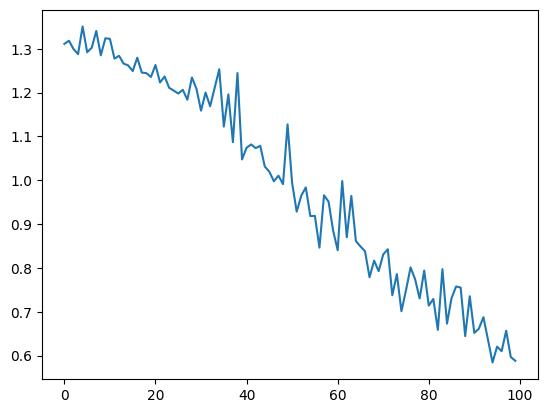

In [34]:
plt.plot(losses)
plt.show()